# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

archive = pd.read_csv('twitter-archive-enhanced.csv')

In [28]:
#view the dataset
archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
113,870726314365509632,8.707262e+17,16487760.0,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
129,867421006826221569,NaN,NaN,2017-05-24 16:44:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shikha. She just watched you drop a sk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/867421006...,12,10,Shikha,None,None,None,puppo
452,818614493328580609,NaN,NaN,2017-01-10 00:24:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bear. He's a passionate believer of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/818614493...,12,10,Bear,None,None,None,None
2055,671362598324076544,NaN,NaN,2015-11-30 16:18:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tanner. He accidentally dropped all hi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671362598...,11,10,Tanner,None,None,None,None
1707,680801747103793152,NaN,NaN,2015-12-26 17:25:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Great picture here. Dog on the right panicked ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680801747...,10,10,None,None,None,None,None
863,762471784394268675,NaN,NaN,2016-08-08 02:13:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Glenn. Being in public scares him. Fright...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/762471784...,12,10,Glenn,None,None,None,None
447,819015331746349057,NaN,NaN,2017-01-11 02:57:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sunny. She was also a v...,8.190064e+17,4.196984e+09,2017-01-11 02:21:57 +0000,https://twitter.com/dog_rates/status/819006400...,14,10,Sunny,doggo,None,None,None
376,828046555563323392,NaN,NaN,2017-02-05 01:04:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sailer. He waits on the roof for his o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828046555...,13,10,Sailer,None,None,None,None
1040,744223424764059648,NaN,NaN,2016-06-18 17:41:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is actually a pupper and I'd pet it so we...,NaN,NaN,NaN,https://twitter.com/strange_animals/status/672...,12,10,actually,None,None,pupper,None
1951,673686845050527744,NaN,NaN,2015-12-07 02:13:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is George. He's upset that the 4th of Jul...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673686845...,11,10,George,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [29]:
#import requests libraries to download the image predictions file
import requests
import os

folder = 'image-predictions'
if not os.path.exists(folder):
    os.makedirs(folder)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(folder, url.split('/')[-1]), mode='wb') as file:
          file.write(response.content)
os.listdir(folder)

['image-predictions.tsv']

In [30]:
#read image predictions folder into pandas dataframe
image_pred = pd.read_csv(folder + '/image-predictions.tsv', sep='\t')
image_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1127,727644517743104000,https://pbs.twimg.com/media/Chkc1BQUoAAa96R.jpg,2,Great_Pyrenees,0.457164,True,kuvasz,0.391710,True,Labrador_retriever,0.094523,True
182,669351434509529089,https://pbs.twimg.com/media/CUoDk8mWsAAMyBL.jpg,1,cuirass,0.756829,False,breastplate,0.233520,False,bulletproof_vest,0.003812,False
1474,780459368902959104,https://pbs.twimg.com/media/CtS_p9kXEAE2nh8.jpg,1,Great_Dane,0.382491,True,German_shepherd,0.312026,True,bull_mastiff,0.033272,True
1932,859196978902773760,https://pbs.twimg.com/ext_tw_video_thumb/85919...,1,Angora,0.224218,False,malamute,0.216163,True,Persian_cat,0.128383,False
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1530,789530877013393408,https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg,3,schipperke,0.363272,True,kelpie,0.197021,True,Norwegian_elkhound,0.151024,True
1774,828046555563323392,https://pbs.twimg.com/media/C33P8PrUcAMiQQs.jpg,3,patio,0.272972,False,window_screen,0.131295,False,boathouse,0.046393,False
611,680115823365742593,https://pbs.twimg.com/media/CXBBurSWMAELewi.jpg,1,pug,0.999365,True,French_bulldog,0.000544,True,Boston_bull,0.000028,True
476,675153376133427200,https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg,1,paper_towel,0.327957,False,mailbox,0.096027,False,seat_belt,0.034995,False
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
api = HIDDEN
api_secret = HIDDEN
access_token = HIDDEN
token_secret = HIDDEN

auth = OAuthHandler(api, api_secret)
auth.set_access_token(access_token, token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [31]:
#read tweet_json file into a pandas dataframe
df1 = pd.read_json('tweet-json1.txt', lines=True)
df1.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [32]:
#select only id, retweet_count and favorite_count columns
tweet_count = df1[['id', 'retweet_count', 'favorite_count']]

In [33]:
#view the tweet dataframe
tweet_count.sample(5)

,id,retweet_count,favorite_count
1839,675878199931371520,1570,4531
748,779124354206535695,21324,0
1074,739606147276148736,1876,5897
1033,744995568523612160,716,3277
1110,733460102733135873,1451,4605


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

> **`archive` table:** This dataframe contains the tweet id, source tweet, the dogs at their different stages, their names, rating numerator and rating denominator, tweet text and timestamp.

> **`image_pred` table:** This dataframe contains the tweet id, dog breed, dog name, prediction score and confidence level.

> **`tweet_count` table:** This dataframe contains the tweet id, number of favorite count and retweet count.

In [8]:
#view a list of the archive columns
list(archive)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [9]:
#view a list of the image predictions columns
list(image_pred)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [10]:
#view a list of the tweet count columns
list(tweet_count)

['id', 'retweet_count', 'favorite_count']

In [11]:
#check for duplicates in archive table
archive.duplicated().sum()

0

In [12]:
#check for duplicated in image predictions table
image_pred.duplicated().sum()

0

In [13]:
#check for duplicated in tweet count table
tweet_count.duplicated().sum()

0

In [14]:
#check for null values in archive table
archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [15]:
#check for null values in image predictons table
image_pred.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [16]:
#check for null values in tweet count table
tweet_count.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [17]:
#view the datatype info for archive table
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
#view the datatype info for image predictions table
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
#view the number of rows and columns for archive table
archive.shape

(2356, 17)

In [20]:
#view the number of rows and columns for image predictions table
image_pred.shape

(2075, 12)

In [21]:
#view the number of rows and columns for tweet count table
tweet_count.shape

(2354, 3)

In [22]:
#view the count, min, max, mean and std for tweet count table
tweet_count.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [23]:
#view the value counts for name column in archive table
archive.name.value_counts()

None              745
a                  55
Charlie            12
Oliver             11
Lucy               11
Cooper             11
Lola               10
Penny              10
Tucker             10
Winston             9
Bo                  9
the                 8
Sadie               8
Buddy               7
Bailey              7
an                  7
Toby                7
Daisy               7
Scout               6
Stanley             6
Rusty               6
Oscar               6
Leo                 6
Dave                6
Bella               6
Koda                6
Jax                 6
Jack                6
Milo                6
Gus                 5
                 ... 
Mona                1
Toffee              1
Monster             1
Julius              1
Tug                 1
Meatball            1
Banjo               1
Sweet               1
Kirk                1
Lenox               1
Superpup            1
Philippe            1
Kaia                1
Charleson           1
Ike       

In [24]:
#view the list of items that are not names in name column
items = archive.name[archive.name.str.contains('^[a-z]')].value_counts()
items

a               55
the              8
an               7
very             5
quite            4
one              4
just             4
not              2
mad              2
getting          2
actually         2
incredibly       1
this             1
unacceptable     1
such             1
life             1
officially       1
old              1
my               1
by               1
his              1
all              1
space            1
light            1
infuriating      1
Name: name, dtype: int64

In [25]:
#view the value counts of rating numerator in archive table
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [26]:
#view the value counts of rating denominator in archive table
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [27]:
#view the dogs in p1 column for image predictions table
image_pred.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
web_site                      19
Cardigan                      19
teddy                         18
beagle                        18
Maltese_dog                   18
Eskimo_dog                    18
Shetland_sheepdog             18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

In [28]:
#view the dogs in p2 column for image predictions table
image_pred.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
collie                             27
Eskimo_dog                         27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
toy_terrier                        20
miniature_pinscher                 20
chow                               20
malinois                           20
Samoyed                            20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [29]:
#view the dogs in p3 column for image predictions table
image_pred.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
toy_poodle                        29
Pekinese                          29
Pomeranian                        29
Pembroke                          27
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
b

In [30]:
#check the number of tweets that have no images
archive.expanded_urls.isnull().sum()

59

In [31]:
#view the value counts for source column
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [32]:
#check the number of rows that contain retweets
archive.retweeted_status_id.notnull().sum()

181

In [33]:
#check the number of rows that contain in-reply tweets
archive.in_reply_to_status_id.notnull().sum()

78

### Quality issues

**`archive` table**

- Rows contain unoriginal tweets in `retweeted_status_id`

2. Rows contain unoriginal tweets in `in_reply_status_id`

3. Erroneous datatype for `timestamp`

4. Improper dog names in `name` column

5. Erroneous values for `rating_denominator` column

5. Erroneous values for `rating_numerator` column

6. Nan or null values in columns

7. Missing images in some of the tweets in `expanded_url` column

- HTML string in `source` column is not easily readable

- Non-descriptive column headers for `image predictions`.

### Tidiness issues
- Columns `doggo`, `floofer`, `pupper`, `puppo` should be in a single column.

- The 3 datasets should be merged in a single table using tweet_id

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing.

In [34]:
# Make copies of original pieces of data
archive_clean = archive.copy()
image_pred_clean = image_pred.copy()
tweet_clean = tweet_count.copy()

### Issue #1: multiple dog type columns

#### Define: 
Melt columns doggo, floofer, pupper, puppo into a single column `dog_stages`

#### Code

In [45]:
#handle none values
archive_clean.doggo.replace('None', '', inplace=True)
archive_clean.floofer.replace('None', '', inplace=True)
archive_clean.pupper.replace('None', '', inplace=True)
archive_clean.puppo.replace('None', '', inplace=True)

In [46]:
#merge doggo, floofer, pupper, puppo columns into a single column
archive_clean['dog_stages'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo

In [47]:
#handle multiple stages
archive_clean.loc[archive_clean.dog_stages == 'doggopupper', 'dog_stages'] = 'doggo, pupper'
archive_clean.loc[archive_clean.dog_stages == 'doggopuppo', 'dog_stages'] = 'doggo, puppo'
archive_clean.loc[archive_clean.dog_stages == 'doggofloofer', 'dog_stages'] = 'doggo, floofer'

In [48]:
#handle missing values
archive_clean.loc[archive_clean.dog_stages == '', 'dog_stages'] = np.nan

**Test**

In [49]:
#view the changes made
archive_clean.dog_stages.value_counts()

pupper            221
doggo              72
puppo              23
floofer             9
doggo, pupper       9
doggo, puppo        1
doggo, floofer      1
Name: dog_stages, dtype: int64

In [50]:
#drop the doggo,floofer, pupper and puppo columns
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [19]:
#view a sample of the dataset
archive_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
895,759159934323924993,NaN,NaN,2016-07-29 22:53:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: AT DAWN...\nWE RIDE\n\n11/10 ht...,6.703191e+17,4.196984e+09,2015-11-27 19:11:49 +0000,https://twitter.com/dog_rates/status/670319130...,11,10,None,NaN
1933,674019345211760640,NaN,NaN,2015-12-08 00:15:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Acro. You briefly see her out of the c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674019345...,10,10,Acro,NaN
1978,672984142909456390,NaN,NaN,2015-12-05 03:41:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Very happy pup here. Always smiling. Loves his...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672984142...,9,10,None,NaN


### Issue #2: Tweets that are replies

#### Define
Remove tweets that are in reply to status as they are not original tweets

#### Code

In [39]:
#select tweets that are replies and drop them
i = archive_clean[archive_clean.in_reply_to_status_id.notnull()].index
archive_clean = archive_clean.drop(i)

**Test**

In [40]:
#check if there are still reply tweets
archive_clean.in_reply_to_status_id.notnull().sum()

0

### Issue #3: Rows that contain retweets

**Define**

Remove rows with tweets that are retweets

**Code**

In [41]:
#select tweets that are retweets and drop them
i = archive_clean[archive_clean.retweeted_status_id.notnull()].index
archive_clean = archive_clean.drop(i)

**Test**

In [42]:
#check if there are still retweets in the dataframe
archive_clean.retweeted_status_id.notnull().sum()

0

### Issue #4: unnecessary columns

**Define**

Drop rows that are not needed or have too many null values

**Code**

In [43]:
#drops columns with data that are not useful
archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
               'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

**Test**

In [51]:
#view the updated dataframe
archive_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN


### Issue #5: Incorrect datatype for `timestamp`

**Define**

Change datatype for `timestamp` from string to datetime

**Code**

In [52]:
#convert datatype for timestamp
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

**Test**

In [53]:
#view the changes made
archive_clean.dtypes

tweet_id                       int64
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
dog_stages                    object
dtype: object

### Issue #6: `source` HTML string not easily readable

**Define**

Replace the HTML source string with something easily readable

**Code**

In [54]:
#replace values for column to be more conspicous
archive_clean.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone', inplace=True)
archive_clean.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine', inplace=True)
archive_clean.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client', inplace=True)
archive_clean.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck', inplace=True)

**Test**

In [55]:
#view the changes made
archive_clean.source.value_counts()

Twitter for iPhone    1964
Vine                    91
Twitter Web Client      31
TweetDeck               11
Name: source, dtype: int64

### Issue #7: Non-descriptive column headers

**Define**

Rename column headers for `image_pred_clean` to be more descriptive

#### Code

In [56]:
#rename column headers for image predictions table to be more descriptive
image_pred_clean.rename(columns={'p1' : 'prediction1', 'p1_conf' : 'confidence1', 'p1_dog' : 'dog_breed1',
                   'p2' : 'prediction2', 'p2_conf' : 'confidence2', 'p2_dog' : 'dog_breed2',
                   'p3' : 'prediction3', 'p3_conf' : 'confidence3', 'p3_dog' : 'dog_breed3'}, inplace=True)

**Test**

In [57]:
#view the changes made
image_pred_clean.head(2)

,tweet_id,jpg_url,img_num,prediction1,confidence1,dog_breed1,prediction2,confidence2,dog_breed2,prediction3,confidence3,dog_breed3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


### Issue #8: Erroneous values for `rating_denominator`

**Define**

Replace incorrect values with 10

**Code**

In [58]:
#change rating denominator values to 10
archive_clean = archive_clean[archive_clean.rating_denominator == 10]

**Test**

In [59]:
#view the changes made
archive_clean.rating_denominator.value_counts()

10    2080
Name: rating_denominator, dtype: int64

### Issue #9: Erroneous values for `rating_numerator`

**Define**

Replace values that are higher than 14

**Code**

In [60]:
archive_clean[archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1712,Here we have uncovered an entire battalion of ...,26


In [61]:
#change the large values for rating numerator to be less than 14
archive_clean = archive_clean[archive_clean.rating_numerator < 14]

**Test**

In [62]:
#view the changes made
archive_clean.rating_numerator.value_counts()

12    486
10    436
11    413
13    287
9     152
8      98
7      51
5      34
6      32
3      19
4      15
2       9
1       4
0       1
Name: rating_numerator, dtype: int64

### Issue #10: Tweets that do not have image link

**Define**

Remove tweets with no images

**Code**

In [63]:
#select the tweets with no images and drop them
i = archive_clean[archive_clean.expanded_urls.isnull()].index
archive_clean = archive_clean.drop(i)

**Test**

In [64]:
#view the changes made
archive_clean.expanded_urls.isnull().sum()

0

### Issue #11: Improper dog names in `name` column

**Define**

Replace names that are not dog names with null

**Code**

In [65]:
#list out values that are not dog names
items = ['a', 'the', 'an', 'very', 'quite', 'just', 'one', 'actually', 'not', 'getting', 'life', 'incredibly', 'officially', 'all',
'space', 'his', 'by', 'mad', 'infuriating',  'my', 'unacceptable', 'light', 'old']

In [66]:
#write a function to replace non-dog names with null
for name in items:
    archive_clean.replace(items, np.nan, inplace=True)

In [67]:
#also replace none with null
archive_clean.replace('None', np.nan, inplace=True)

**Test**

In [68]:
#view the changes made
archive_clean.name.value_counts()

Charlie     11
Lucy        11
Oliver      10
Cooper      10
Tucker       9
Penny        9
Sadie        8
Lola         8
Winston      8
Toby         7
Daisy        7
Stanley      6
Jax          6
Bella        6
Bailey       6
Koda         6
Oscar        6
Louis        5
Milo         5
Bentley      5
Chester      5
Scout        5
Rusty        5
Buddy        5
Bo           5
Leo          5
Dave         5
Gus          4
Clarence     4
Bear         4
            ..
Blue         1
Toffee       1
Fletcher     1
Milky        1
Kirk         1
Robin        1
Cali         1
Jamesy       1
Tango        1
Walker       1
Burt         1
Zooey        1
Miguel       1
Sobe         1
Chase        1
Jennifur     1
Sprout       1
Dawn         1
JD           1
Tug          1
Bronte       1
DonDon       1
Alf          1
Rascal       1
Lilly        1
Bubba        1
Lance        1
Ike          1
Banjo        1
Bruiser      1
Name: name, Length: 916, dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

### Merge datasets

>Merge dataframes into a single table using `tweet_id`

In [69]:
#rename id to tweetid to enable merging in tweet_clean dataframe
tweet_clean.rename(columns={'id' : 'tweet_id'}, inplace=True)

In [70]:
#view the changes made
tweet_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [71]:
#merge datasets into a single dataframe
df= archive_clean.merge(image_pred_clean, on='tweet_id', how='inner')
twitter_archive_master= df.merge(tweet_clean, on='tweet_id', how='inner')

In [72]:
#store the cleaned dataset into a .csv file
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [3]:
#load the dataset into a dataframe
import seaborn as sb
master = pd.read_csv('twitter_archive_master.csv')
master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,...,confidence1,dog_breed1,prediction2,confidence2,dog_breed2,prediction3,confidence3,dog_breed3,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


# Insights and Visualisations


## #1. Which dog stage has the highest number of ratings? 

In [4]:
#get the sum of rating numerator grouped by dog stages
dogs = master.groupby('dog_stages').rating_numerator.sum()
dogs

dog_stages
doggo              651
doggo, floofer      11
doggo, pupper       88
doggo, puppo        13
floofer             84
pupper            2029
puppo              250
Name: rating_numerator, dtype: int64

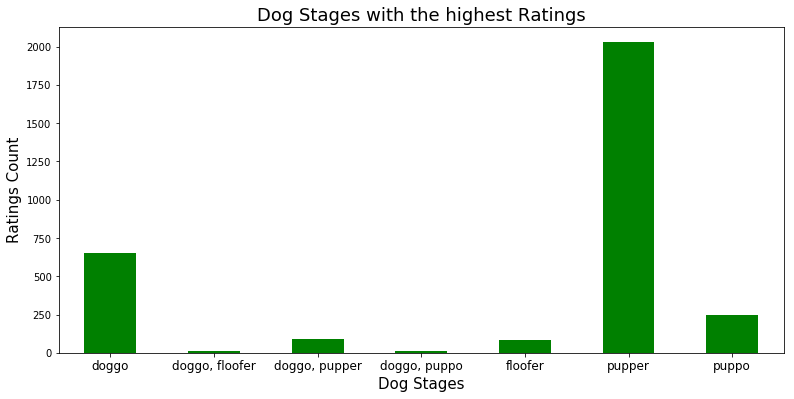

In [5]:
#plot a bar chart showing the dog stages and their number of ratings
plt.figure(figsize=(13,6))
dogs.plot(kind='bar', color='green')
plt.title('Dog Stages with the highest Ratings', fontsize=18)
plt.xlabel('Dog Stages', fontsize=15)
plt.ylabel('Ratings Count', fontsize=15)
plt.xticks(rotation=None, fontsize=12)
plt.show()

> This bar chart shows the dog stages with their ratings received. Pupper has the highest number of ratings received at over 2000.

## #2. Which source has the highest number of favorite count?

In [71]:
#get the total favorite count grouped by source
sources = master.groupby('source').favorite_count.sum()
sources

source
TweetDeck                58160
Twitter Web Client      148964
Twitter for iPhone    16367898
Name: favorite_count, dtype: int64

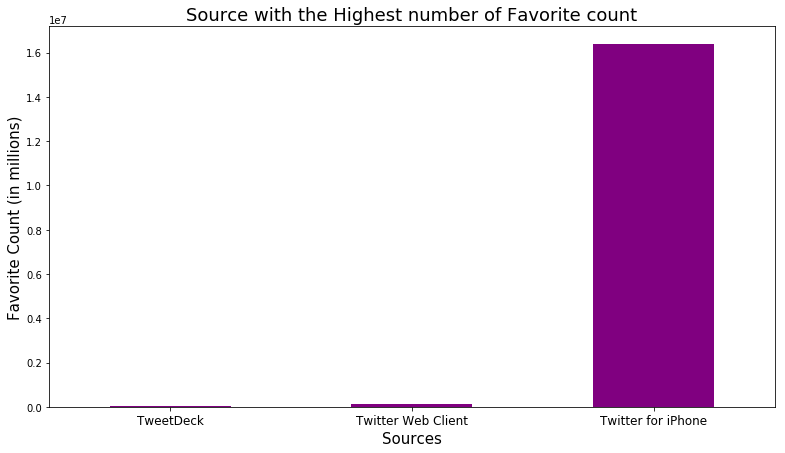

In [72]:
#plot a bar chart showing source according to their favorite count
plt.figure(figsize=(13,7))
sources.plot(kind= 'bar', color='purple')
plt.title('Source with the Highest number of Favorite count', fontsize=18)
plt.xlabel('Sources', fontsize=15)
plt.ylabel('Favorite Count (in millions)', fontsize=15)
plt.xticks(rotation=None, fontsize=12)
plt.show()

> This bar chart shows that Twitter for iPhone has the highest and most significant number of Favorite counts at over 1.6million, this is followed by Twitter Web Client and TweetDeck source has the least number of favorite counts.

## #3. Is there a relationship between retweet count and favorite count?

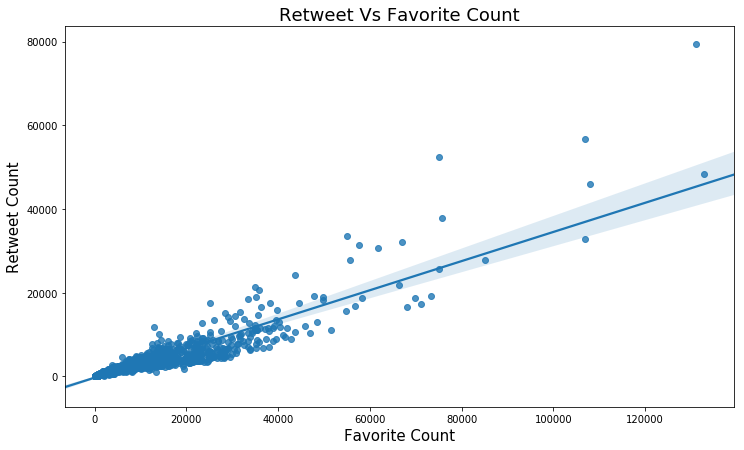

In [73]:
#plot a scatterplot showing the relationship between favorite and retweet count
plt.figure(figsize=[12,7])
sb.regplot(data=master, x='favorite_count', y='retweet_count')
plt.title('Retweet Vs Favorite Count', fontsize=18)
plt.xlabel('Favorite Count', fontsize=15)
plt.ylabel('Retweet Count', fontsize=15);

> This scatterplot shows that there is a strong positive linear relationship between the numeric variables: Retweet count and Favorite count

## #4.Top 10 Dog breeds with the highest number of favourite count?

In [75]:
#get the top 10 dog breeds according to their favorite count
breeds = master.groupby('prediction1').favorite_count.sum().sort_values(ascending=False).head(10)
breeds

prediction1
golden_retriever      1638918
Labrador_retriever    1111859
Pembroke               907290
Chihuahua              647355
Samoyed                492792
chow                   404241
French_bulldog         382460
pug                    320223
cocker_spaniel         315825
Cardigan               260287
Name: favorite_count, dtype: int64

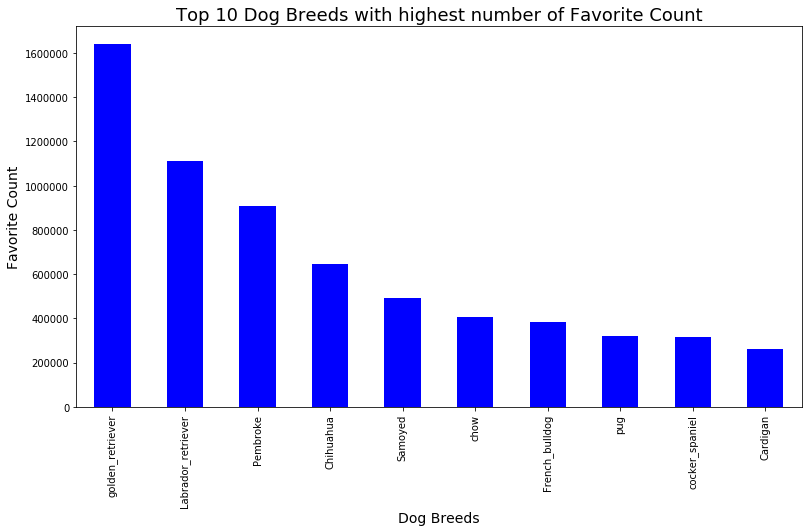

In [76]:
#plot a bar chart showing the top 10 dog breeds
plt.figure(figsize=(13,7))
breeds.plot(kind= 'bar', color='blue')
plt.title('Top 10 Dog Breeds with highest number of Favorite Count', fontsize=18)
plt.xlabel('Dog Breeds', fontsize=14)
plt.ylabel('Favorite Count', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.show()

> This bar chart shows the top 10 dog breeds with the highest being Golden Retriever with over 1.6 million favorite counts.